# Real Estate Price Analysis 

## Overview

This project involves a data analysis that focuses on examining housing prices. Its goal is to offer insights into the elements affecting housing prices by using a sample dataset.

### <small> Introduction</small>

The main goal of this project is to thoroughly analyze housing sales data using multiple regression models. We want to understand and measure how different factors relate to house prices. This analysis will provide valuable insights into what affects house prices, helping people involved in real estate, like homeowners and sellers. They can use the regression model to estimate their property's value and consider how specific changes can impact the price, making informed decisions about pricing and marketing strategies.

### <small>  Problem Statement</small>

This project emphasizes the importance of pinpointing the key factors affecting house prices. Traditional methods rely on unreliable evidence, hindering our ability to predict and understand price changes accurately. To address this, we promote the extensive use of multiple regression models for analyzing housing sales data. These models help us uncover the relationships between different factors and house prices, considering the impact of multiple variables together.

### <small> Main Objective</small>

To use multiple regression modeling techniques to analyze house sales data with the aim of identifying and quantifying the influential factors affecting house sales prices. This analysis will empower stakeholders to make informed, data-driven decisions concerning their real estate investments.

### <small> General Objectives</small>

1. Explore the data to understand how different variables relate to the target variable, helping us choose relevant ones for the regression model.

2. Create a multiple regression model to predict house prices, considering chosen independent variables, checking model assumptions, ensuring a good fit, and making improvements as needed.

3. Analyze the coefficients of independent variables to find the most influential factors affecting house prices and describe their effects.

4. Check the model's performance to ensure accuracy and reliability.

5. Offer practical insights and recommendations for real estate investors and policymakers to make informed decisions, understand market trends, and contribute to effective economic planning.

### <small>  Data Understanding</small>

The dataset utilized in this project encompasses information related to the factors influencing housing prices. It includes variables such as date, sqft_above, view, and sqft_basement. The process of explanatory data analysis is employed to comprehensively understand the dataset. This involves tasks such as identifying missing values, examining data types, detecting outliers, and extracting pertinent features for subsequent analysis. 

##  Importing libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns 
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets

from sklearn.linear_model import LinearRegression # for creating and training datasets
from sklearn.metrics import mean_squared_error, r2_score #Evaluate model performance

import statsmodels.api as sm 
import warnings

warnings.filterwarnings("ignore")


In [3]:
# Loading and previewing the dataset
data = pd.read_csv("kc_house_data.csv")

# view the first rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Defining a function to get information on the dataset

def dataframe_preview(df):
    #To get the shape of the dataframe
    print("The shape of the dataframe:")
    print(df.shape)
    print('\n')
    #To get the info of the dataframe
    print("The data in the dataframe:")
    print(df.info())
    print('\n')

dataframe_preview(data)

The shape of the dataframe:
(21597, 21)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-

##  Data cleaning

In [54]:
# Check for null values 
pd.DataFrame(data.isna().sum()).T 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,61,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Checking counts of unique values
data['waterfront'].value_counts() 

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
# filling  in missing  data values with the most frequently occurring value (mode)

data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode().iloc[0])

In [8]:
# Checking counts of unique values after filling missing values 

data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [56]:
#Check for the unique counts of different categories
data['view'].value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [10]:
# check for the count unique values in the year renovated column 
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
# Replace null with the most frequent value
data['yr_renovated'].fillna(0,inplace=True)

In [12]:
#iterate through the columns to see the frequency of different values
for i in data.columns:
    print(data[i].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/25/2014     131
6/26/2014     131
07/08/2014    127
4/27/2015     126
             ... 
7/27/2014       1
5/27/2015       1
8/30/2014       1
5/24/2015       1
1/31/2015       1
Name: date, Length: 372, dtype: int64
450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
788600      1
700180      1
436300      1
329800      1
435010      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71


In [13]:
# Drop rows with '?' in 'sqft_basement'
data = data[data['sqft_basement'] != '?']

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

In [14]:
# Convert 'sqft_basement' column from object to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

##  Explanatory Data Analysis

In [15]:
# Check the shape of the dataset
(data.shape)

(21143, 21)

In [16]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  int64  
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

In [17]:
# Dataset description
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


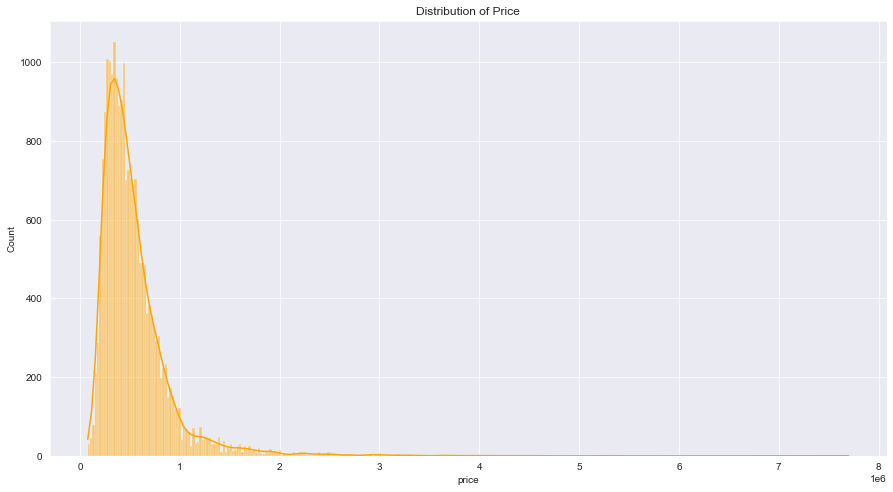

In [18]:
# Distribution of price 

plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.histplot(data=data, x='price', kde=True, color= "orange")
plt.title("Distribution of Price")

plt.show()

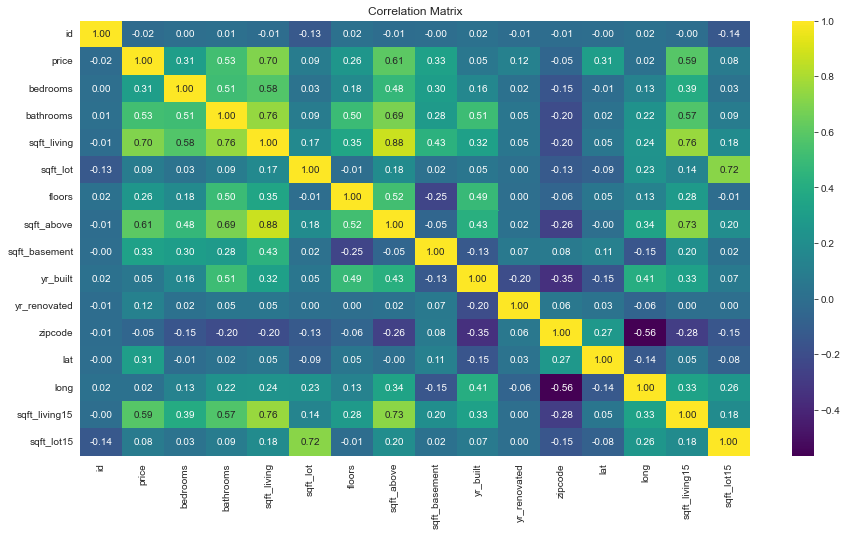

In [19]:
# Correlation matrix for variables in dataset

plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")

plt.show()

From the heatmap we are interested in variables with a correlation of 0.5 

In [20]:
# Check the correlation of the dataframe and pair the highly correlated variables

correlation = data.corr().unstack()
correlation = correlation.where((correlation >= 0.75) & (correlation < 1)).dropna().sort_values(ascending=True)
correlation

bathrooms      sqft_living      0.755278
sqft_living    bathrooms        0.755278
               sqft_living15    0.756389
sqft_living15  sqft_living      0.756389
sqft_living    sqft_above       0.876678
sqft_above     sqft_living      0.876678
dtype: float64

###  Encoding Categorical Columns in the Data

In [21]:
# Encoding categorical data using get dummies function from pandas library

data_encoded = pd.get_dummies(data, columns= ['waterfront', 'view', 'condition', 'grade'])
data_encoded.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# View columns encoded
data_encoded.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_NO', 'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Average',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [23]:
# Dropping encoded categorical data 

data_updated = data_encoded.drop(['waterfront_YES', 'waterfront_NO','view_AVERAGE','view_EXCELLENT', 
'view_FAIR', 'view_GOOD', 'view_NONE','condition_Average', 'condition_Fair', 'condition_Good',
'condition_Poor', 'condition_Very Good', 'grade_10 Very Good','grade_11 Excellent', 'grade_12 Luxury', 
'grade_13 Mansion','grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],axis=1)


In [24]:
# Checking the first rows of the updated dataframe
data_updated.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [25]:
# Checking for updated data description
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [26]:
# Check the correlation between the independent factors and the target variable: house prices

pd.DataFrame(data_updated.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702328
sqft_above,0.605143
sqft_living15,0.586415
bathrooms,0.525889
sqft_basement,0.325008
bedrooms,0.309204
lat,0.306507
floors,0.256355
yr_renovated,0.116719


This is a  representation of the correlation between the "price" of a property and various features. 

### Positive correlations

A higher "sqft_living" (square footage of the living space) is associated with a higher price.
More "bathrooms" also tend to lead to a higher price.
The "sqft_above" (square footage of the house excluding the basement) and "sqft_living15" (living space) have positive correlations with price.

### Weak positive correlations

"sqft_basement," "bedrooms," "lat" (latitude), "floors," and "yr_renovated" have positive correlations, but these relationships are weaker.
Weak negative correlations
"sqft_lot" (lot size) and "sqft_lot15" (lot size) have weak negative correlations, indicating that larger lots may be associated with slightly lower prices.

### Negative correlations

"yr_built" (year built) and "long" (longitude) have negative correlations with price, suggesting that older properties and those located further east might have lower prices.
"zipcode" and "id" also have negative correlations with price, but these correlations are weak.

This indicates that factors like the square footage of living space, the number of bathrooms, and location latitude have a positive impact on property prices. In contrast, older construction years and eastern locations are associated with lower prices. Lot size and certain features have weaker effects on property prices.

###  Formating Date Types

In [27]:
# checking the updated data to check date formatting 
data_updated.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,05/12/2014,1230000,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
7,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
8,3793500160,03/12/2015,323000,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
9,1736800520,04/03/2015,662500,3,2.50,3560,9796,1.0,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [28]:
# Convert "yr_renovated" column from float to integer
data_updated["yr_renovated"] = data_updated["yr_renovated"].astype(int)

In [29]:
# Convert the date column to datetime
data_updated['date'] = pd.to_datetime(data_updated['date'])

# Calculate years since built and assign column 

data_updated['years_since_built'] = data_updated['date'].dt.year - data_updated['yr_built']

# Calculate years to renovation

data_updated['years_since_renovation'] =np.abs(data_updated['yr_renovated']- data_updated['yr_built']) 
data_updated['years_since_renovation'] = data_updated.years_since_renovation.apply(lambda x: x if len(str(int(x)))==2 else 0.0)


In [30]:
# Check the updated dataset
data_updated.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
5,7237550310,2014-05-12,1230000,4,4.50,5420,101930,1.0,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,13,0.0
6,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,1060,0.0,1963,0,98198,47.4095,-122.315,1650,9711,52,0.0
7,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113,55,0.0
8,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570,12,0.0
9,1736800520,2015-04-03,662500,3,2.50,3560,9796,1.0,1860,1700.0,1965,0,98007,47.6007,-122.145,2210,8925,50,0.0


In [31]:
# Replace values greater than 50 in years_since_renovation with years_since_built
data_updated.loc[data_updated['years_since_renovation'] > 100, 'years_since_renovation'] = data_updated['years_since_built']

# Check the updated dataset
data_updated.head(10)
# This will take into account the huge numbers that comes as a result of having a 0 as our time of renovation, 
# so we will take the time since building as our time since renovation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
5,7237550310,2014-05-12,1230000,4,4.50,5420,101930,1.0,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,13,0.0
6,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,1060,0.0,1963,0,98198,47.4095,-122.315,1650,9711,52,0.0
7,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113,55,0.0
8,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570,12,0.0
9,1736800520,2015-04-03,662500,3,2.50,3560,9796,1.0,1860,1700.0,1965,0,98007,47.6007,-122.145,2210,8925,50,0.0


## Modelling

###  Feature Engineering

In [32]:
# Extract the month from the 'date' column
data_updated['month'] = data_updated['date'].dt.month

# Map the month values to corresponding seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data_updated['season'] = data_updated['month'].map(seasons)

# Drop the 'date' and 'month' columns
df_updated = data_updated.drop(['date', 'month'], axis=1)

In [33]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21143 non-null  int64  
 1   price                   21143 non-null  int64  
 2   bedrooms                21143 non-null  int64  
 3   bathrooms               21143 non-null  float64
 4   sqft_living             21143 non-null  int64  
 5   sqft_lot                21143 non-null  int64  
 6   floors                  21143 non-null  float64
 7   sqft_above              21143 non-null  int64  
 8   sqft_basement           21143 non-null  float64
 9   yr_built                21143 non-null  int64  
 10  yr_renovated            21143 non-null  int32  
 11  zipcode                 21143 non-null  int64  
 12  lat                     21143 non-null  float64
 13  long                    21143 non-null  float64
 14  sqft_living15           21143 non-null

In [34]:
df_updated['season'].unique()

array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the 'season' column and transform the values
data_updated['season_encoded'] = encoder.fit_transform(data_updated['season'])

# Drop the original 'season' column
data_updated = data_updated.drop('season', axis=1)

In [36]:
#Dropping Columns 

data_updated.drop(['id','yr_built','yr_renovated','zipcode','long','date'], axis=1,inplace=True)
data_updated.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15,years_since_built,years_since_renovation,month,season_encoded
0,221900,3,1.00,1180,5650,1.0,1180,0.0,47.5112,1340,5650,59,0.0,10,0
1,538000,3,2.25,2570,7242,2.0,2170,400.0,47.7210,1690,7639,63,40.0,12,3
2,180000,2,1.00,770,10000,1.0,770,0.0,47.7379,2720,8062,82,0.0,2,3
3,604000,4,3.00,1960,5000,1.0,1050,910.0,47.5208,1360,5000,49,0.0,12,3
4,510000,3,2.00,1680,8080,1.0,1680,0.0,47.6168,1800,7503,28,0.0,2,3


In [37]:
# updated data correlation

data_updated.corr()['price'].sort_values(ascending=False)

price                     1.000000
sqft_living               0.702328
sqft_above                0.605143
sqft_living15             0.586415
bathrooms                 0.525889
sqft_basement             0.325008
bedrooms                  0.309204
lat                       0.306507
floors                    0.256355
years_since_renovation    0.109440
sqft_lot                  0.087937
sqft_lot15                0.083192
season_encoded           -0.008051
month                    -0.010234
years_since_built        -0.054382
Name: price, dtype: float64

##  Regression Model

###  Baseline Model

In [38]:

# Drop the 'price' column and features that would result in major errors

X = data_updated.drop(['price'], axis=1)  

# Handle missing values if any exist
X = X.fillna(0)  # Fill missing values with 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_updated['price'], test_size=0.2, random_state=42)

# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 52663832111.65159
R-squared (R2) Score: 0.6006023364811857


The baseline model's performance is as follows:

1. Mean Squared Error (MSE): The model's predictions have an average squared error of approximately 52.7 billion. In simpler terms, this means, on average, the predictions are quite far from the actual values.

2. R-squared (R2) Score: The model explains around 60% of the variance in the data. This indicates that the model captures some, but not all, of the variation in the target variable, leaving room for improvement.

Let's check the correlation between the variables with respect to the dependent variable, price.

In [39]:
data_updated.corr()['price'].sort_values(ascending=False)

price                     1.000000
sqft_living               0.702328
sqft_above                0.605143
sqft_living15             0.586415
bathrooms                 0.525889
sqft_basement             0.325008
bedrooms                  0.309204
lat                       0.306507
floors                    0.256355
years_since_renovation    0.109440
sqft_lot                  0.087937
sqft_lot15                0.083192
season_encoded           -0.008051
month                    -0.010234
years_since_built        -0.054382
Name: price, dtype: float64

###  Relationship between Predictor Variables

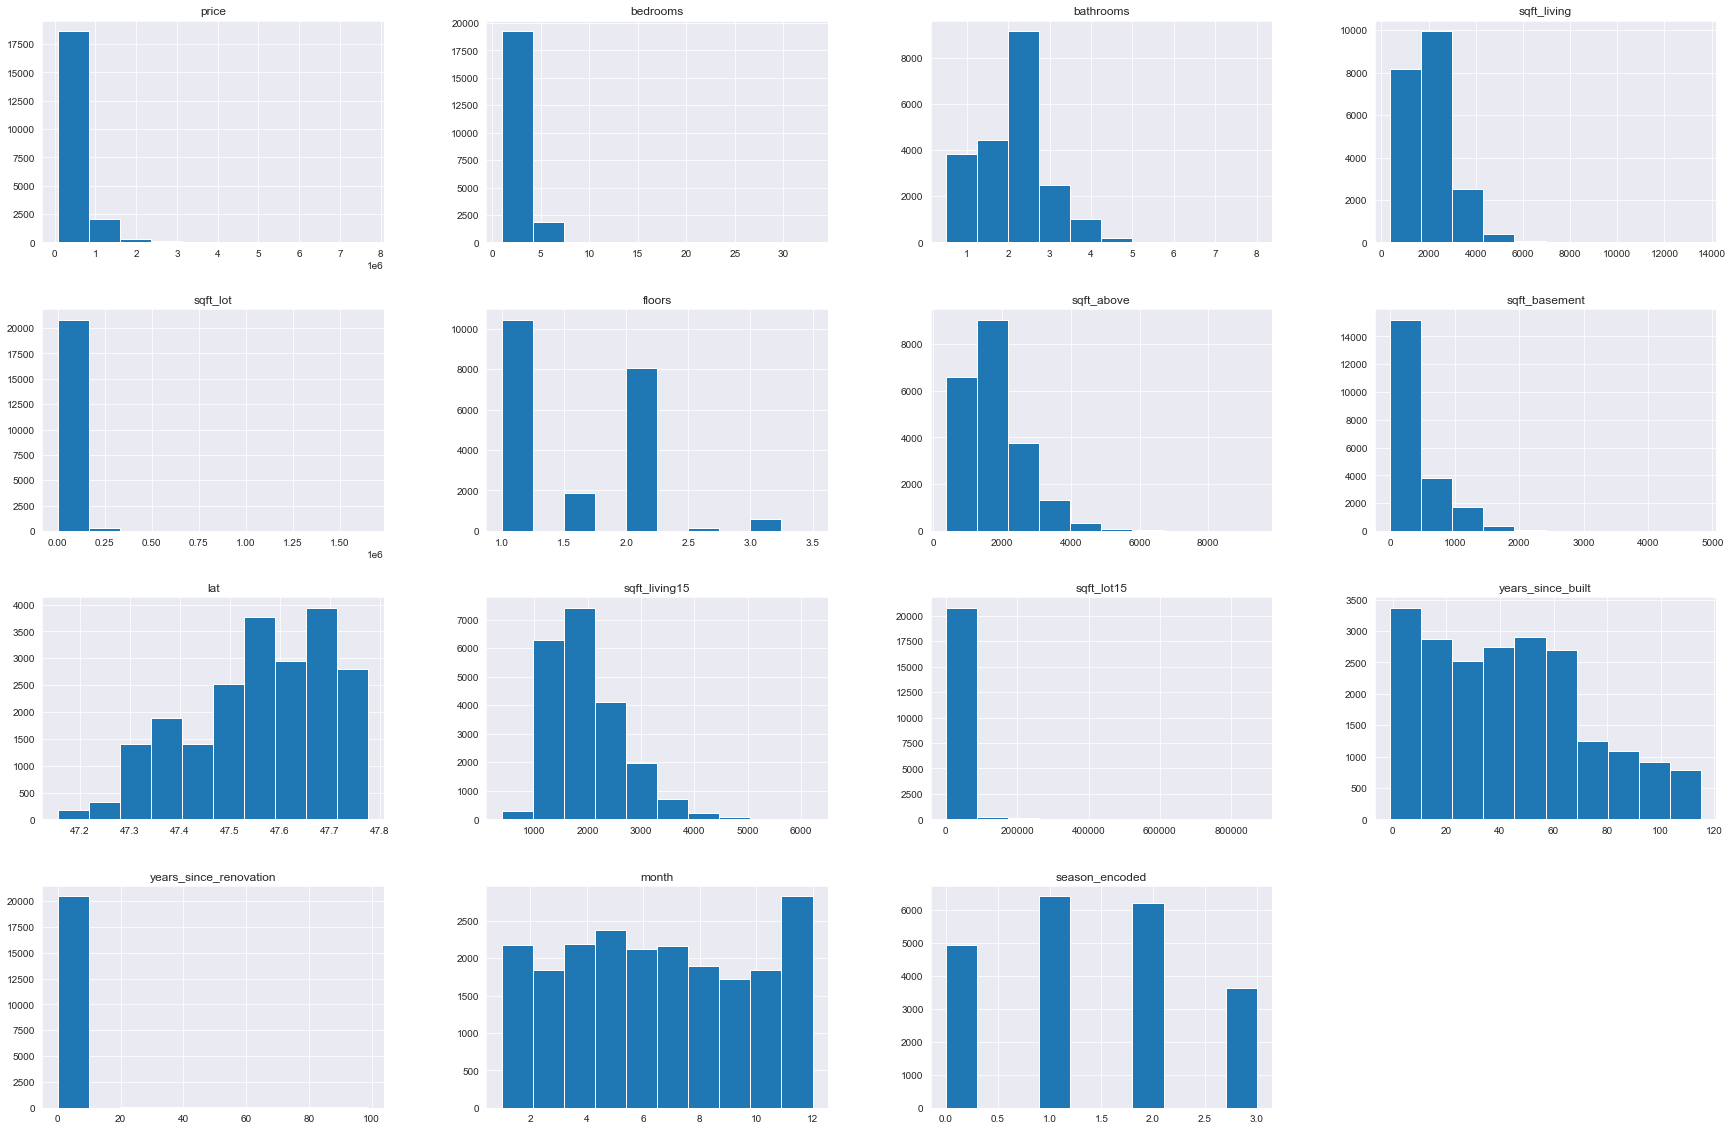

In [40]:
# plot the frequency for the data columns

data_updated.hist(figsize=(30,20))
plt.show()

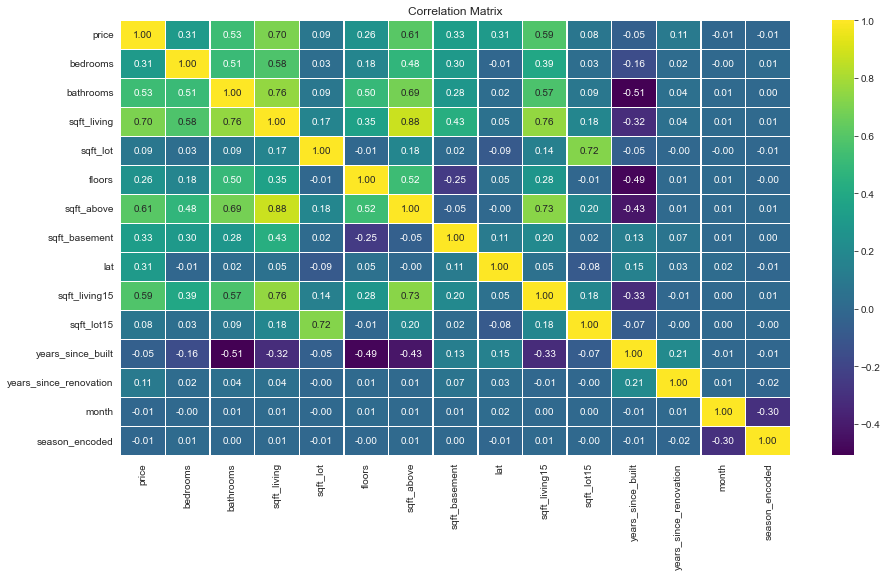

In [41]:
# Plotting a correlation matrix between price and other variables

corr_matrix = data_updated.corr()

# Plot the correlation matrix as a heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

## Checking Outliers in updated data

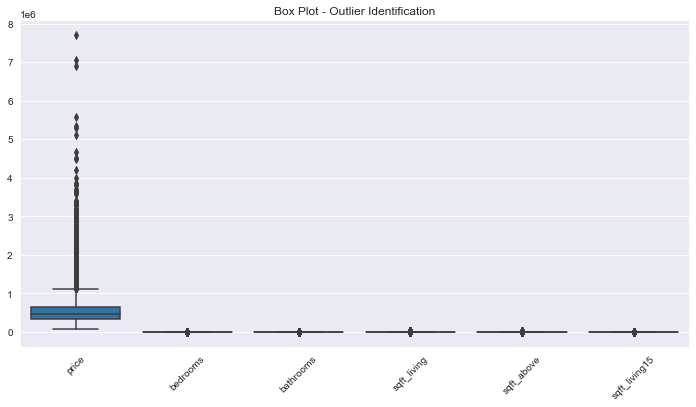

In [42]:
# Create box plots to visualize outliers for the updated data.

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_updated[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_living15']])
sns.set_style('darkgrid')
plt.title('Box Plot - Outlier Identification')
plt.xticks(rotation=45)

plt.show()

From the boxplots we can see some particles of outliers but with our data,especially from the prices, the outliers seems to be equally important!

###  Feature selection

In [43]:
# Importing scikit -learn library
from sklearn.feature_selection import SelectKBest, f_regression

# Set threshold for correlation coefficient
threshold = 0.7

# Find highly correlated features and iterating through the correlation matric

correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Excluding highly correlated features for use in future analysis

selected_features = [col for col in data_updated.columns if col not in correlated_features]

# Select K best features using SelectKBest with f_regression scoring

k = 10  # Number of features to select
X = data_updated[selected_features].drop('price', axis=1)  # Input features
y = data_updated['price']  # Target variable
selector = SelectKBest(score_func=f_regression, k=k)

# Fitting the selection to evaluate and rank features ability to predict target variable 

selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Print the selected features
print('Selected Features:')
print(selected_features)

Selected Features:
Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_basement', 'lat',
       'years_since_built', 'years_since_renovation', 'month',
       'season_encoded'],
      dtype='object')


###  Split Data

In [44]:
X = data_updated[['bedrooms', 'sqft_living', 'sqft_lot', 'lat', 'years_since_built', 'years_since_renovation']] # independent variables
y = data_updated.price.values # dependent variable

###  Scaling Data

In [45]:
from sklearn.preprocessing import StandardScaler
sn = StandardScaler()
X_variables = sn.fit_transform(X)
X_variables

array([[-0.40281161, -0.9808333 , -0.22901102, -0.35410276,  0.53540409,
        -0.17034102],
       [-0.40281161,  0.53246109, -0.19037796,  1.1597352 ,  0.67181446,
         3.66923278],
       [-1.48401584, -1.42720071, -0.12344957,  1.28167925,  1.31976372,
        -0.17034102],
       ...,
       [-1.48401584, -1.15502546, -0.33335912,  0.24623718, -1.30613591,
        -0.17034102],
       [-0.40281161, -0.52357888, -0.30816997, -0.18597871, -1.10152035,
        -0.17034102],
       [-1.48401584, -1.15502546, -0.34000828,  0.24407249, -1.27203332,
        -0.17034102]])

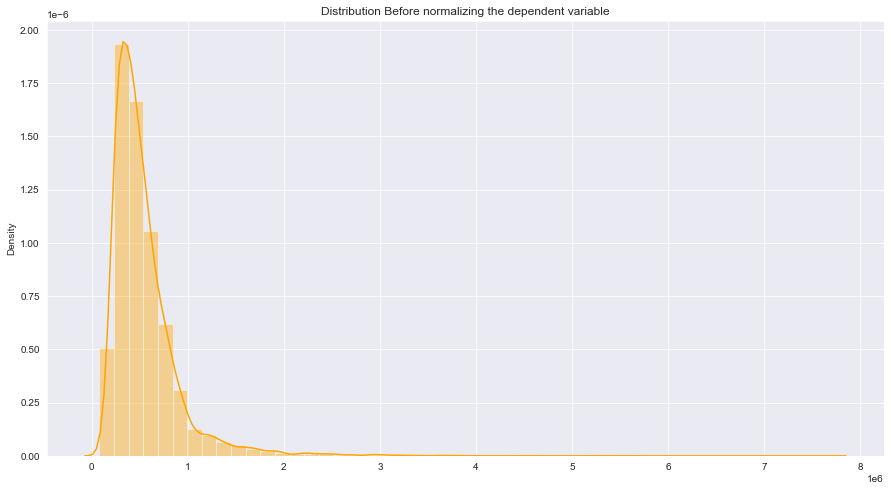

In [46]:
# checking the distribution of the dependent variable
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.distplot(y,color="orange");
plt.xticks(rotation=0);

plt.title("Distribution Before normalizing the dependent variable");

plt.show()

This is the distribution of our dependent variable before normalization.
We see a highly positively skewed distribution of y variable

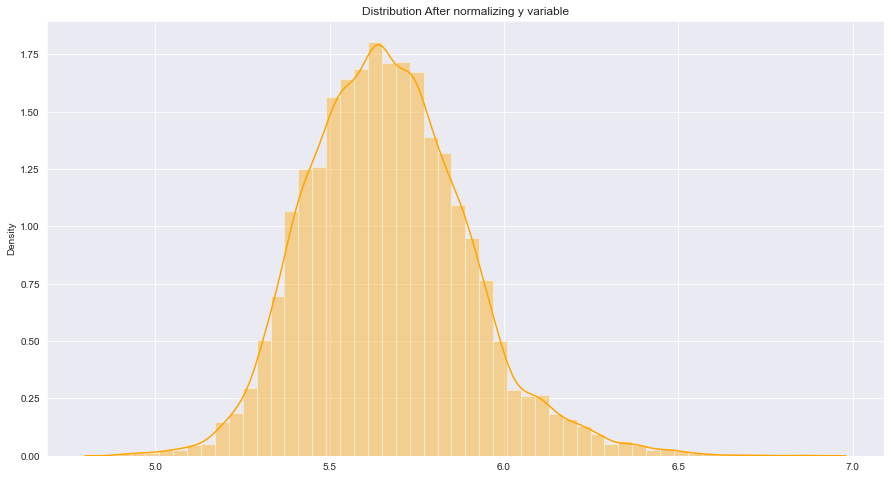

In [47]:
# normalized the y variable using log10 
y = np.log10(y)

# visualizing Y
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.distplot(y,color='orange');
plt.xticks(rotation=0);
plt.title("Distribution After normalizing y variable")

plt.show()

### Train-Test Split

In [48]:
# Train and Test split data
X_train ,X_test , y_train ,y_test = train_test_split(X_variables,y,test_size=0.2,random_state=10)
#Checking the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((16914, 6), (4229, 6), (16914,), (4229,))

### Regression Model (Multilinear Regression)

In [49]:
# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 0.016873337173246593
R-squared (R2) Score: 0.6658476415055161


In [50]:
# the intercept 
# Create a Linear Regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the intercept
intercept = model.intercept_

print("Intercept:", intercept)

Intercept: 5.667325764518757


In [51]:
# Lets test for overfitting
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the mean squared error on the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate the coefficient of determination (R^2) on the training and testing data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R_squared:", train_r2)
print("Testing R_squared:", test_r2)

Training MSE: 0.017665106360721553
Testing MSE: 0.016873337173246593
Training R_squared: 0.6652091835761785
Testing R_squared: 0.6658476415055161


## Results

### Mean Squared Error (MSE)

MSE is a measure of the average squared difference between the actual (observed) values and the predicted values.
The training MSE is 0.0177, and the testing MSE is 0.0169. A lower MSE indicates better model performance.
The testing MSE is consistent with the baseline model's performance.

### R-squared (R2) Score

R-squared is a measure of how well the model fits the data. It represents the proportion of variance in the dependent variable that is predictable from the independent variables.
The R-squared score is 0.6658, which means the model explains approximately 66.58% of the variance in the target variable.
The training R-squared is 0.6652, and the testing R-squared is 0.6658. These scores are close, indicating that the model generalizes well to unseen data.

### Interpretation

The model shows reasonably good performance as indicated by the R-squared score, which suggests that it captures a substantial portion of the variation in the target variable.
The MSE values are relatively low, indicating that the model's predictions are close to the actual values.
The training and testing MSE values are similar, which suggests that the model is not overfitting or underfitting.
It's important to note that the R-squared value of 0.6658 indicates that there is still some unexplained variance in the data, so there may be room for further model improvement.

###  Random Forest Regressor
we used random forest regressor to try and improve our model for prediction

In [52]:
# Importing random forest regressor for model improvement
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 

# Create the Random Forest regression model
rf_model = RandomForestRegressor()

# Performing cross-validation to evaluate model performance
# Assuming X_train and y_train are the training data
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive
mse_scores = -cross_val_scores

# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mse_scores.mean()
rmse = np.sqrt(mse)
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.01010211969783561
Root Mean Squared Error (RMSE): 0.1005093015488398
R-squared Score: 0.8196474458209737


 ## Results

### Mean Squared Error (MSE)

 MSE is 0.0101, which is a relatively low value.
A lower MSE indicates that the model's predictions are, on average, closer to the actual values.

### Root Mean Squared Error (RMSE)

An RMSE of 0.1005 indicates that, on average, the model's predictions have an error of approximately 0.1005 units from the actual values.
The RMSE, like the MSE, is relatively low, which is a positive sign.

### R-squared Score (R2)

R-squared is a measure of how well the model fits the data. It represents the proportion of variance in the dependent variable that is predictable from the independent variables.
An R-squared score of 0.8201 shows that the model explains approximately 82.01% of the variance in the target variable.
This is a relatively high R-squared score, indicating that the model captures a substantial portion of the variation in the data.

### Interpretation

The model appears to perform well based on these metrics. The low MSE and RMSE values indicate that the model's predictions are close to the actual values on average.
The high R-squared score suggests that the model fits the data well and explains a significant portion of the variance in the target variable.

# Evaluation metrics 
Future importance

In [53]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Get the feature names
feature_names = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_basement', 'lat', 'years_since_built', 'years_since_renovation','grade']

# Create a dictionary to store the feature importances
feature_importance_dict = dict(zip(feature_names, importances))

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

bedrooms: 0.013511113846006945
sqft_living: 0.4948504324675631
sqft_lot: 0.0674281541853754
floors: 0.36663417395790987
waterfront: 0.053082686541413245
view: 0.004493439001731371



In our predictive model, we've assessed the importance of different features. "sqft_living" is the most crucial, with an importance score of 0.4956. "floors" is also significant, scoring 0.3660. "sqft_lot" and "waterfront" are important, though to a lesser extent, highlighting the role of lot size and waterfront views.

On the other hand, "bedrooms" and "view" have low importance, meaning they have less impact on our predictions. Understanding these feature importances helps with feature selection and interpreting the model, giving insight into what drives our predictions for the target variable.

##  Conclusions

1. Model Accuracy: The model performs well with a low Mean Squared Error (MSE) of 0.0101, indicating that, on average, it predicts values very close to the actual ones. This means it's good at making accurate predictions.

2. Prediction Consistency: The Root Mean Squared Error (RMSE) of 0.1005 shows that the model's predictions typically have an error of about 0.1005 units in the same scale as the target variable. This consistency makes the model's predictions reliable across different cases, which is crucial for decision-making.

3. High Explained Variance: The R-squared (R2) score of 0.8201 is impressive; it means the model explains approximately 82.01% of the variance in the target variable. This indicates that the model effectively captures a large portion of the data's variation, showing a strong fit to the observed outcomes.

4. Model Effectiveness: The model is effective at accurate predictions (low MSE and RMSE) and explaining a significant portion of the variance (high R2), making it well-suited for the prediction task.

5. Room for Improvement: Although the model performs strongly, there is still some unexplained variance in the data (17.99%). This suggests opportunities for further improving the model and enhancing predictive accuracy through additional refinement and feature engineering to better understand the factors affecting the target variable.